In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import json
import datetime
import pytz
import gc
from textblob import TextBlob
from datetime import date

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from sklearn.feature_extraction import text
import nltk
import re
from scipy.signal import find_peaks

from summarizers import Summarizers


/Users/diplavsrivastava/opt/anaconda3/envs/ECE219_1/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
summarize = Summarizers('normal')

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BartTokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


In [6]:
tweet_path = '../ECE219_tweet_data/'
pst_tz = pytz.timezone('America/Los_Angeles')

### Q9.1) Report the following statistics for each hashtag

In [11]:
def get_avg_tweet_per_hour(data):
    df = pd.DataFrame(data,columns=['timestamp'])
    group = df.groupby(pd.Grouper(key = 'timestamp',freq = '60min'))
    avg_tweet = len(data) / len(group)
    return avg_tweet

def get_avg_follower_per_tweet(data):
    return np.mean(data)

def get_avg_retweet_per_tweet(data):
    return np.mean(data)

def get_statistics(file):
    time = []
    num_retweet = []
    num_follower = []
    for line in open(file):
        json_object = json.loads(line)
        time.append(datetime.datetime.fromtimestamp(json_object['citation_date']))
        num_retweet.append(json_object['metrics']['citations']['total'])
        num_follower.append(json_object['author']['followers'])
    avg_tweets = get_avg_tweet_per_hour(time)
    avg_follower = get_avg_follower_per_tweet(num_follower)
    avg_retweet = get_avg_retweet_per_tweet(num_retweet)
    return avg_tweets, avg_follower, avg_retweet

In [12]:
filename = os.path.join(tweet_path, 'tweets_#gohawks.txt')

avg_tweets, avg_follower, avg_retweet = get_statistics(filename)

print("Average number of tweets per hour #goHwaks: ", avg_tweets)
print("Average number of followers of users posting tweet #goHwaks: ", avg_follower)
print("Average number of retweets per tweet #goHwaks: ", avg_retweet)

Average number of tweets per hour #goHwaks:  292.09326424870466
Average number of followers of users posting tweet #goHwaks:  2217.9237355281984
Average number of retweets per tweet #goHwaks:  2.0132093991319877


In [13]:
filename = os.path.join(tweet_path, 'tweets_#gopatriots.txt')

avg_tweets, avg_follower, avg_retweet = get_statistics(filename)

print("Average number of tweets per hour #gopatriots: ", avg_tweets)
print("Average number of followers of users posting tweet #gopatriots: ", avg_follower)
print("Average number of retweets per tweet #gopatriots: ", avg_retweet)

Average number of tweets per hour #gopatriots:  40.888695652173915
Average number of followers of users posting tweet #gopatriots:  1427.2526051635405
Average number of retweets per tweet #gopatriots:  1.4081919101697078


In [14]:
filename = os.path.join(tweet_path, 'tweets_#nfl.txt')

avg_tweets, avg_follower, avg_retweet = get_statistics(filename)

print("Average number of tweets per hour #nfl: ", avg_tweets)
print("Average number of followers of users posting tweet #nfl: ", avg_follower)
print("Average number of retweets per tweet #nfl: ", avg_retweet)

Average number of tweets per hour #nfl:  396.97103918228277
Average number of followers of users posting tweet #nfl:  4662.37544523693
Average number of retweets per tweet #nfl:  1.5344602655543254


In [15]:

filename = os.path.join(tweet_path, 'tweets_#patriots.txt')

avg_tweets, avg_follower, avg_retweet = get_statistics(filename)

print("Average number of tweets per hour #patriots: ", avg_tweets)
print("Average number of followers of users posting tweet #patriots: ", avg_follower)
print("Average number of retweets per tweet #patriots: ", avg_retweet)

Average number of tweets per hour #patriots:  750.6320272572402
Average number of followers of users posting tweet #patriots:  3280.4635616550277
Average number of retweets per tweet #patriots:  1.7852871288476946


In [16]:
filename = os.path.join(tweet_path, 'tweets_#sb49.txt')

avg_tweets, avg_follower, avg_retweet = get_statistics(filename)

print("Average number of tweets per hour #sb49: ", avg_tweets)
print("Average number of followers of users posting tweet #sb49: ", avg_follower)
print("Average number of retweets per tweet #sb49: ", avg_retweet)

Average number of tweets per hour #sb49:  1275.5557461406518
Average number of followers of users posting tweet #sb49:  10374.160292019487
Average number of retweets per tweet #sb49:  2.52713444111402


In [17]:
filename = os.path.join(tweet_path, 'tweets_#superbowl.txt')

avg_tweets, avg_follower, avg_retweet = get_statistics(filename)

print("Average number of tweets per hour #superbowl: ", avg_tweets)
print("Average number of followers of users posting tweet #superbowl: ", avg_follower)
print("Average number of retweets per tweet #superbowls: ", avg_retweet)

Average number of tweets per hour #superbowl:  2067.824531516184
Average number of followers of users posting tweet #superbowl:  8814.96799424623
Average number of retweets per tweet #superbowls:  2.3911895819207736


### Question 9.2) Plot “number of tweets in hour” 

In [21]:
def get_number_tweets_in_hours(filename):
    citation_dates = []
    for line in open(filename):
        json_object = json.loads(line)
        citation_dates.append(json_object['citation_date'])
    dates_frame = pd.DataFrame(sorted(citation_dates), columns = ['date'])
    dates_frame['date'] = dates_frame['date'].apply(lambda x: datetime.datetime.fromtimestamp(x))
    dates_frame['day'] = dates_frame['date'].apply(lambda x: str(x).split(' ')[0].split('-')[2]).astype('int')
    dates_frame['hour'] = dates_frame['date'].apply(lambda x: str(x).split(' ')[1].split(':')[0]).astype('int')
    
    days = dates_frame['day'].to_numpy()
    hour = dates_frame['hour'].to_numpy()
    tweets_cnt = []
    k = 0
    while True:
        if k >= len(days):
            break

        j = k

        cnt = 0
        curr_hour = hour[j]
        curr_day = days[j]
        while j < len(days) and curr_hour == hour[j] and curr_day == days[j]:
            cnt+= 1
            j+= 1

        k = j

        tweets_cnt.append(cnt)

        if k >= len(days):
            break
    return tweets_cnt



In [22]:
filename = os.path.join(tweet_path, 'tweets_#superbowl.txt')
tweets_cnt_superbowl = get_number_tweets_in_hours(filename)

Text(0, 0.5, 'Tweets per hour')

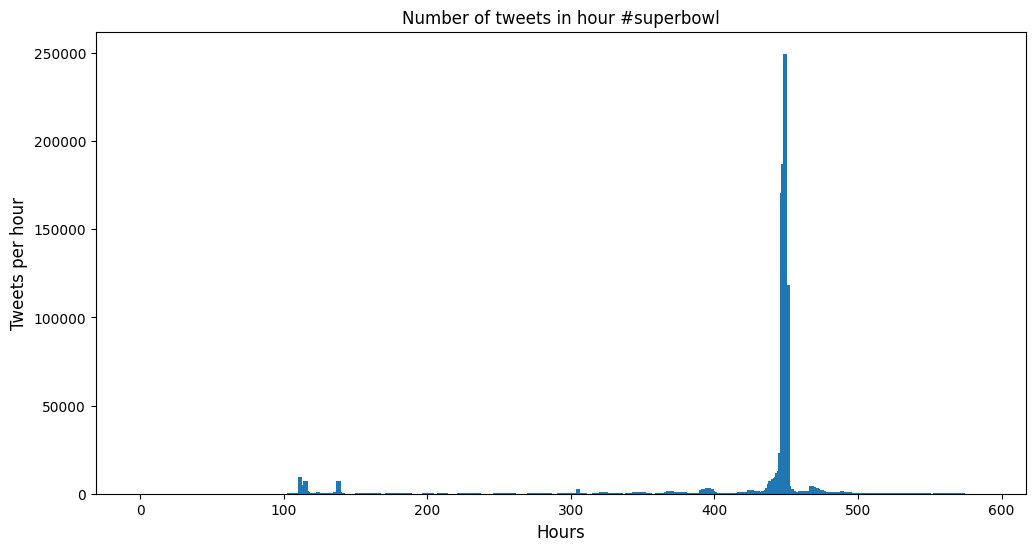

In [24]:
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(6)

plt.bar(np.arange(len(tweets_cnt_superbowl)), tweets_cnt_superbowl, width=3)
plt.title("Number of tweets in hour #superbowl", size = 12)
plt.xlabel("Hours", size = 12)
plt.ylabel("Tweets per hour", size = 12)

In [25]:
filename = os.path.join(tweet_path, 'tweets_#nfl.txt')
tweets_cnt_nfl = get_number_tweets_in_hours(filename)

Text(0, 0.5, 'Tweets per hour')

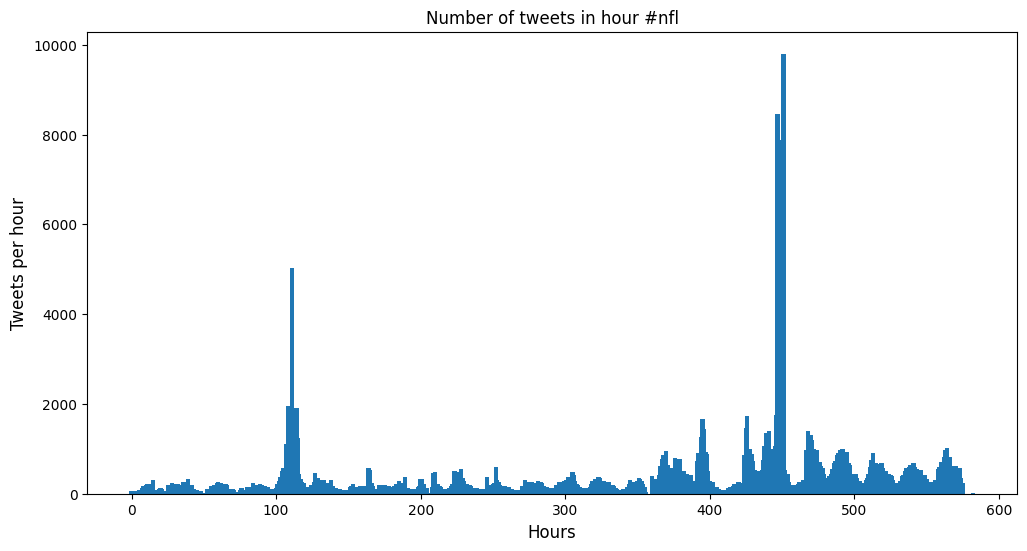

In [26]:
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(6)

plt.bar(np.arange(len(tweets_cnt_nfl)), tweets_cnt_nfl, width=3)
plt.title("Number of tweets in hour #nfl", size = 12)
plt.xlabel("Hours", size = 12)
plt.ylabel("Tweets per hour", size = 12)

### Question 10) Define your own task